In [46]:
!pip3 install ann_visualizer
!pip3 install keras-visualizer

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import tensorflow as tf

from keras.regularizers import l2
from keras.models import Sequential
from keras.layers import Dense


from sklearn.metrics import accuracy_score

from ann_visualizer.visualize import ann_viz
from keras_visualizer import visualizer 


In [47]:
from google.colab import files
uploaded = files.upload()

Saving diff.csv to diff (1).csv


In [48]:
# Importing the datasets
datasets = pd.read_csv('diff.csv', sep=',')
X = datasets.iloc[:, [0,1]].values
Y = datasets.iloc[:, 2].values
datasets.head()

,ID,IB,R
0,0.1,0.0,0
1,0.1,0.5,0
2,0.1,1.0,0
3,0.1,1.5,0
4,0.1,2.0,0


In [51]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_Train)

X_train1 = scaler.transform(X_Train)
X_train1 = X_train1.astype(np.float32)

X_test1 = scaler.transform(X_Test)
X_test1 = X_test1.astype(np.float32)

In [55]:
model = Sequential()
model.add(Dense(8, input_dim=2, activation='relu', kernel_regularizer=l2(0.2)))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary() 

history = model.fit(X_train1, Y_Train, validation_data = (X_test1, Y_Test), epochs=500, verbose=2)

ann_viz(model, title="Differential_Protection_Curve_DeepNeuralNetwork");
visual = visualizer(model, format='png', view=True)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 8)                 24        
                                                                 
 dense_34 (Dense)            (None, 8)                 72        
                                                                 
 dense_35 (Dense)            (None, 4)                 36        
                                                                 
 dense_36 (Dense)            (None, 1)                 5         
                                                                 
Total params: 137
Trainable params: 137
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
7/7 - 1s - loss: 1.1580 - accuracy: 0.7268 - val_loss: 1.1553 - val_accuracy: 0.6667 - 806ms/epoch - 115ms/step
Epoch 2/500
7/7 - 0s - loss: 1.1329 - accuracy: 0.7561 - val_los

In [56]:
all_predict = model.predict(X_test1)
n = 0
for r in all_predict:
  if all_predict[n][0] < 0.5:
    all_predict[n][0] = 0
  else:
    all_predict[n][0] = 1
  n = n+1
# print(all_predict)
# print(Y_Test)
print("accuracy deep neural network: ", accuracy_score(Y_Test, all_predict))


accuracy deep neural network:  0.9710144927536232


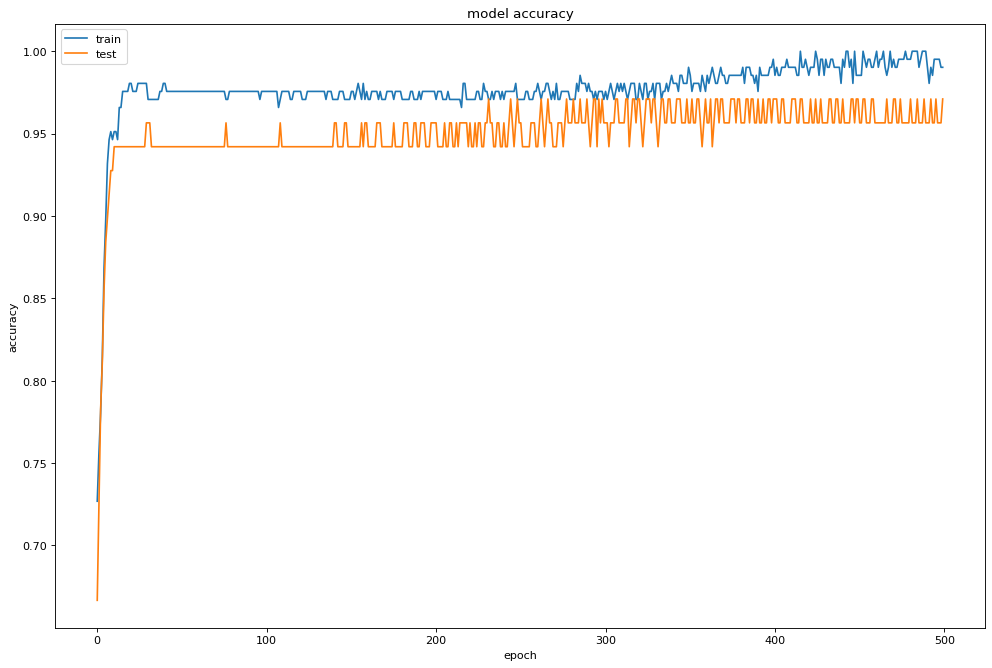

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [64]:
# summarize history for accuracy
figure(figsize=(15, 10), dpi=80)
fig1 = plt.gcf()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

fig1.savefig("model_accuracy.png", dpi=200)
files.download("model_accuracy.png") 

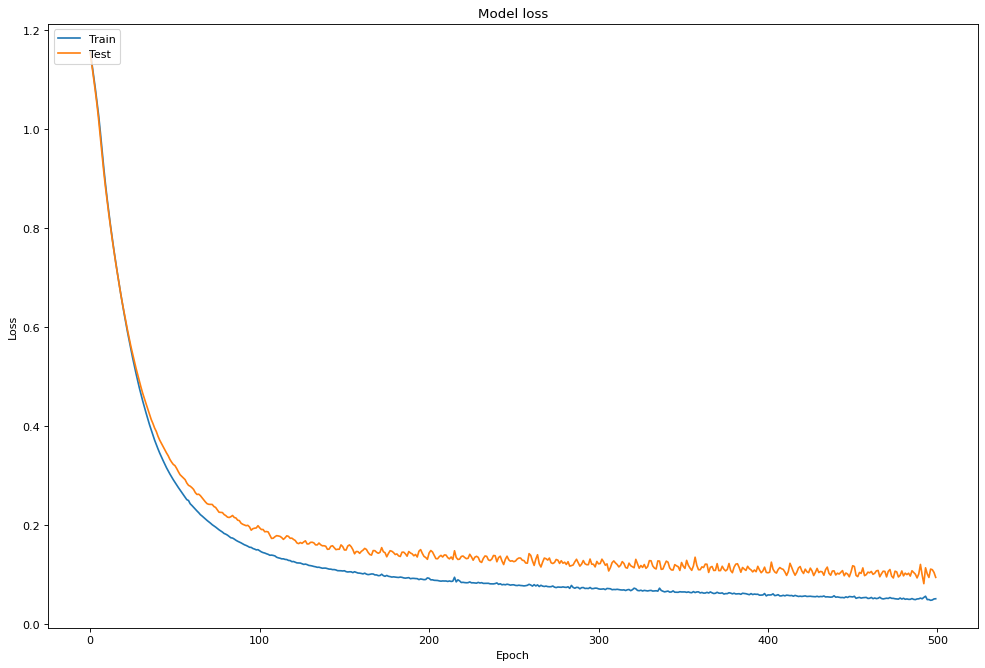

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

In [57]:
figure(figsize=(15, 10), dpi=80)
fig1 = plt.gcf()

plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()
plt.draw()

fig1.savefig("nn_resolve_overfitting.png", dpi=200)
files.download("nn_resolve_overfitting.png") 

In [58]:
all_predict = model.predict(X_test1)
print(Y_Test)
all_predict

[1 1 1 1 1 0 1 0 0 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1
 0 1 1 0 0 1 1 0 1 1 0 1 0 1 1 0 0 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0]


array([[9.9999261e-01],
       [9.9999976e-01],
       [7.9113638e-01],
       [9.9685973e-01],
       [9.9705255e-01],
       [3.8278580e-02],
       [9.2521203e-01],
       [2.2397518e-02],
       [3.3257867e-05],
       [9.9988484e-01],
       [1.0000000e+00],
       [9.9994206e-01],
       [1.0000000e+00],
       [1.8364111e-05],
       [2.0140409e-04],
       [9.8910341e-06],
       [6.9185116e-05],
       [9.9999249e-01],
       [1.1093883e-05],
       [9.9957287e-01],
       [1.8703789e-01],
       [1.9628406e-02],
       [1.0528564e-03],
       [2.1592337e-01],
       [9.9951851e-01],
       [1.2841821e-04],
       [3.6006302e-02],
       [9.9999976e-01],
       [9.9999923e-01],
       [1.3123363e-05],
       [1.2820959e-04],
       [1.3027787e-03],
       [1.5524169e-05],
       [1.0000000e+00],
       [5.0723553e-04],
       [3.3938903e-01],
       [1.0000000e+00],
       [7.5795028e-06],
       [9.9726647e-01],
       [9.9999982e-01],
       [2.6879028e-05],
       [6.700080

In [59]:
# x_sample = scaler.transform([[1.130 , 4.479   ]])
x_sample = scaler.transform([[2.55, 3]])
# x_sample = scaler.transform([[1.748, 15]])
# x_sample = scaler.transform([[6.950, 10]])
# x_sample = scaler.transform([[7.26, 3]])
x_sample = x_sample.astype(np.float32)

predict = model.predict(x_sample)
print(predict)

[[1.]]


In [61]:
model.save( 'models/model.h5' )

tflite_model = tf.keras.models.load_model('models/model.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(tflite_model)
tflite_save = converter.convert()
open("tfliteModel.tflite", "wb").write(tflite_save)

INFO:tensorflow:Assets written to: /tmp/tmpm_fyfftl/assets


INFO:tensorflow:Assets written to: /tmp/tmpm_fyfftl/assets


2784